In [1]:
#data explorer
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt

#url = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22ANDYEAR%3A[1988&fields=STNAME%2CYEAR%2CINTINC%2CEINTEXP%2CNIM%2CNONII%2CNONIX%2CELNATR%2CITAXR%2CIGLSEC%2CITAX%2CEXTRA%2CNETINC&sort_by=YEAR&sort_order=DESC&limit=10&offset=0&format=json&download=false&filename=data_file"
url = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22&fields=STNAME%2CYEAR%2CINTINC%2CEINTEXP%2CNIM%2CNONII%2CNONIX%2CELNATR%2CITAXR%2CIGLSEC%2CITAX%2CEXTRA%2CNETINC&sort_by=YEAR&sort_order=DESC&limit=24&offset=0&format=json&download=false&filename=data_file"
summary_by_year = {}

In [2]:
# List of the states
state_list = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

year_list = []
for i in range(25):
    year_list.append(1988 + i)

# Loop to add each state's data to dictionary 
for state in state_list:
    url_state = url.format(state)
    summary_by_year.update({state: requests.get(url_state).json()})
#print(summary_by_year.keys())


In [3]:
summary_by_year['Alabama']
#pprint(summary_by_year['Alabama']['data'][0]['data'])

{'data': [{'data': {'EINTEXP': 919157,
    'ELNATR': 526215,
    'EXTRA': 0,
    'IGLSEC': 26973,
    'INTINC': 8597659,
    'ITAX': 1221536,
    'ITAXR': 3510133,
    'NETINC': 2311678,
    'NIM': 7678502,
    'NONII': 3085435,
    'NONIX': 6727589,
    'STNAME': 'Alabama',
    'YEAR': '2017'}},
  {'data': {'EINTEXP': 3922,
    'ELNATR': 47,
    'EXTRA': 0,
    'IGLSEC': 19,
    'INTINC': 21221,
    'ITAX': 1828,
    'ITAXR': 4809,
    'NETINC': 3000,
    'NIM': 17299,
    'NONII': 12093,
    'NONIX': 24536,
    'STNAME': 'Alabama',
    'YEAR': '2017'}},
  {'data': {'EINTEXP': 3805,
    'ELNATR': 306,
    'EXTRA': 0,
    'IGLSEC': 80,
    'INTINC': 20651,
    'ITAX': 1500,
    'ITAXR': 4989,
    'NETINC': 3569,
    'NIM': 16846,
    'NONII': 12712,
    'NONIX': 24263,
    'STNAME': 'Alabama',
    'YEAR': '2016'}},
  {'data': {'EINTEXP': 842847,
    'ELNATR': 670092,
    'EXTRA': 0,
    'IGLSEC': 52486,
    'INTINC': 7994518,
    'ITAX': 861640,
    'ITAXR': 2945067,
    'NETINC': 2132

In [70]:
columns = list(summary_by_year['Alabama']['data'][0]['data'].keys())

KeyError: 'data'

In [76]:
for y, s in zip(year_list, state_list):
    print(y, s)

1988 Alabama
1989 Alaska
1990 Arizona
1991 Arkansas
1992 California
1993 Colorado
1994 Connecticut
1995 Delaware
1996 Florida
1997 Georgia
1998 Hawaii
1999 Idaho
2000 Illinois
2001 Indiana
2002 Iowa
2003 Kansas
2004 Kentucky
2005 Louisiana
2006 Maine
2007 Maryland
2008 Massachusetts
2009 Michigan
2010 Minnesota
2011 Mississippi
2012 Missouri


In [130]:
debt_data = "../raw-data/fdicdata.csv"
debt = pd.read_csv(debt_data)


In [131]:
debt = debt.fillna(0)
debt.groupby('Year').sum()

,Unnamed: 0,Auto Loans,Total Loans,Other Loans,Credit Cards,Real Estate,Total Past Due
Year,,,,,,,
1987,24,0.0,347986020,245471027,102514993,598699606,40563426
1988,23,0.0,374548881,257762209,116786672,673296777,41180485
1989,22,0.0,397857791,266883392,130974399,759284022,48058033
1990,21,0.0,399324743,266413460,132911283,825891247,58032820
1991,20,0.0,388996614,250462590,138534024,847976872,52539038
1992,19,0.0,383083172,247248620,135834552,864346330,43288016
1993,18,0.0,417290491,263489524,153800967,917591402,35896675
1994,17,0.0,484162516,296457862,187704654,990449769,34451707
1995,16,0.0,532640233,314878416,217761817,1072504445,41434525


In [155]:
debt['Other Loans'] = debt['Other Loans'] + debt['Auto Loans']
debt['Total Loans'] = debt['Total Loans'] + debt['Real Estate']
debt_clean = debt.drop(columns = ['Unnamed: 0','Auto Loans'])
debt_clean.sort_values('Year')

,Total Loans,Other Loans,Credit Cards,Real Estate,State,Total Past Due,Year
24,946685626,245471027.0,102514993,598699606,United States,40563426,1987
23,1047845658,257762209.0,116786672,673296777,United States,41180485,1988
22,1157141813,266883392.0,130974399,759284022,United States,48058033,1989
21,1225215990,266413460.0,132911283,825891247,United States,58032820,1990
20,1236973486,250462590.0,138534024,847976872,United States,52539038,1991
19,1247429502,247248620.0,135834552,864346330,United States,43288016,1992
18,1334881893,263489524.0,153800967,917591402,United States,35896675,1993
17,1474612285,296457862.0,187704654,990449769,United States,34451707,1994
16,1605144678,314878416.0,217761817,1072504445,United States,41434525,1995
15,1690880054,325319914.0,234598883,1130961257,United States,47557076,1996


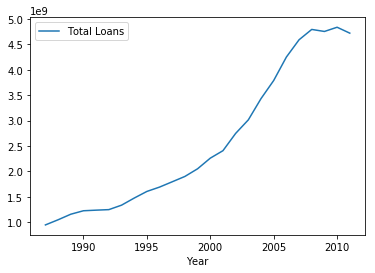

In [156]:
debt_clean_all_years = debt_clean.groupby('Year').sum().reset_index()
debt_clean_all_years.plot(x='Year', y='Total Loans')

In [157]:
debt_clean_first_rec = debt_clean[(debt_clean['Year'] == 1987) | (debt_clean['Year'] == 1988) | (debt_clean['Year'] == 1989) | (debt_clean['Year'] == 1990) | 
          (debt_clean['Year'] == 1991) | (debt_clean['Year'] == 1992) | (debt_clean['Year'] == 1993)]

debt_clean_second_rec = debt_clean[(debt_clean['Year'] == 1997) | (debt_clean['Year'] == 1998) | (debt_clean['Year'] == 1999) | (debt_clean['Year'] == 2000) | 
          (debt_clean['Year'] == 2001) | (debt_clean['Year'] == 2002) | (debt_clean['Year'] == 2003)]

debt_clean_third_rec = debt_clean[(debt_clean['Year'] == 2005) | (debt_clean['Year'] == 2006) | (debt_clean['Year'] == 2007) | (debt_clean['Year'] == 2008) | 
          (debt_clean['Year'] == 2009) | (debt_clean['Year'] == 2010) | (debt_clean['Year'] == 2011)]


In [158]:
debt_clean_first_rec_tot = debt_clean_first_rec.groupby('Year').sum().reset_index()
debt_clean_second_rec_tot = debt_clean_second_rec.groupby('Year').sum().reset_index()
debt_clean_third_rec_tot = debt_clean_third_rec.groupby('Year').sum().reset_index()

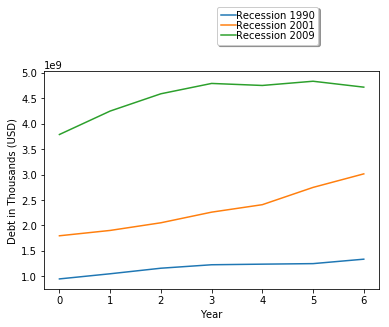

In [159]:
plt.plot(debt_clean_first_rec_tot['Total Loans'])
plt.plot(debt_clean_second_rec_tot['Total Loans'])
plt.plot(debt_clean_third_rec_tot['Total Loans'])
plt.legend(['Recession 1990', 'Recession 2001', 'Recession 2009'], loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.show()

Text(0, 0.5, 'Debt in Thousands (USD)')

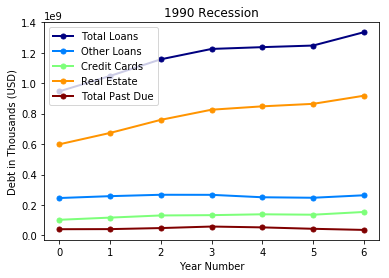

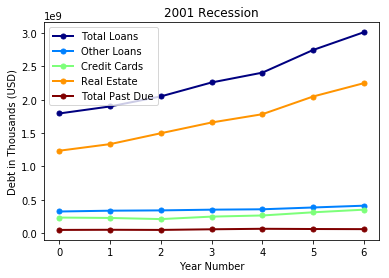

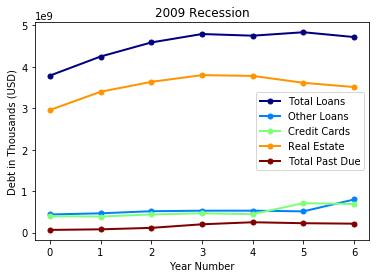

In [160]:
debt_clean_first_rec_tot_plot = debt_clean_first_rec_tot.drop(columns = ['Year'])
ax = debt_clean_first_rec_tot_plot.plot(lw=2, colormap='jet', marker='.', markersize=10, title='1990 Recession')
ax.set_xlabel("Year Number")
ax.set_ylabel("Debt in Thousands (USD)")

debt_clean_second_rec_tot_plot = debt_clean_second_rec_tot.drop(columns = ['Year'])
ax2 = debt_clean_second_rec_tot_plot.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2001 Recession')
ax2.set_xlabel("Year Number")
ax2.set_ylabel("Debt in Thousands (USD)")


debt_clean_third_rec_tot_plot = debt_clean_third_rec_tot.drop(columns = ['Year'])
ax3 = debt_clean_third_rec_tot_plot.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2009 Recession')
ax3.set_xlabel("Year Number")
ax3.set_ylabel("Debt in Thousands (USD)")

#debt_clean_first_rec_tot.plot(x='Year', y='Total Loans', kind = 'line')
#debt_clean_second_rec_tot.plot(x='Year', y='Total Loans')
#debt_clean_third_rec_tot.plot(x='Year', y='Total Loans')

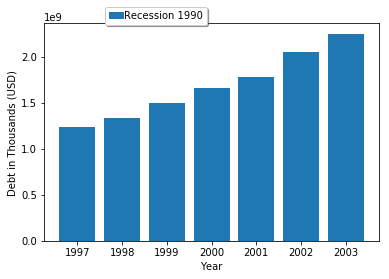

In [161]:
#plt.bar(debt_clean_first_rec_tot['Year'],debt_clean_first_rec_tot['Total Loans'])
plt.bar(debt_clean_second_rec_tot['Year'],debt_clean_second_rec_tot['Real Estate'])
#plt.bar(debt_clean_second_rec_tot['Year'],debt_clean_third_rec_tot['Real Estate'])
plt.legend(['Recession 1990', 'Recession 2001', 'Recession 2009'], loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.show()

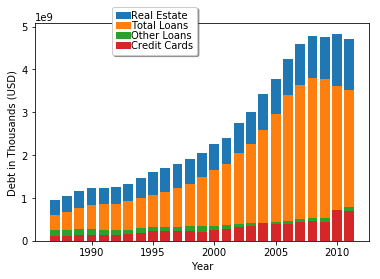

In [163]:
plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Total Loans'])
plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Real Estate'])
plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Total Loans', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.show()

In [164]:
debt_clean_all_years_test = debt_clean_all_years
per = debt_clean_all_years['Total Loans']
pers = []
for i in range(1,len(per)):
    delta = ((per[i]/per[i-1]) -1) * 100
    pers.append(delta)

In [165]:

store_col = list(debt_clean_all_years.keys())
store_col.pop(0)
#print(store_col)
a_df = pd.DataFrame()
for head in store_col:
    if head == 'Year':
        a_df[head] = debt_clean_all_years[head]
    else:
        percentage = debt_clean_all_years[head]
        percs = []
        for i in range(1,len(percentage)):
            delta = 0
            delta = ((percentage[i] - percentage[i-1])/percentage[i]) * 100
            percs.append(delta)
        a_df[head] = percs
    
a_df

#pd.concat([pd.DataFrame[j], columns = [head] for j in range(len(store))], ignore_index=True)

#pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)], ignore_index=True)

,Total Loans,Other Loans,Credit Cards,Real Estate,Total Past Due
0,9.654097,4.768419,12.220298,11.079389,1.498426
1,9.445355,3.417666,10.832443,11.324780,14.310923
2,5.556096,-0.176392,1.457276,8.064891,17.188182
3,0.950505,-6.368564,4.058744,2.604508,-10.456571
4,0.838205,-1.299894,-1.987324,1.893854,-21.370862
5,6.551320,6.163776,11.681601,5.802700,-20.590601
6,9.475738,11.120750,18.062252,7.356089,-4.194184
7,8.132126,5.850053,13.802770,7.650754,16.852656
8,5.070459,3.209609,7.176959,5.168772,12.874112
9,5.810202,-0.154298,-0.327946,8.537729,2.153867


In [166]:
def percentage_delta(header):
    empty_df = pd.DataFrame()
    percen = []
    for head in store_col:
        percentages = debt_clean_all_years[head]
        percen = []
        for i in range(1,len(percentages)):
            delta = 0
            delta = ((percentages[i] - percentages[i-1])/percentages[i]) * 100
            percen.append(delta)
        empty_df[head] = percen
    empty_df['Year'] = debt_clean_all_years['Year'] + 1
    return empty_df

In [167]:
percentage_delta_df = percentage_delta(store_col)
percentage_delta_df

,Total Loans,Other Loans,Credit Cards,Real Estate,Total Past Due,Year
0,9.654097,4.768419,12.220298,11.079389,1.498426,1988
1,9.445355,3.417666,10.832443,11.324780,14.310923,1989
2,5.556096,-0.176392,1.457276,8.064891,17.188182,1990
3,0.950505,-6.368564,4.058744,2.604508,-10.456571,1991
4,0.838205,-1.299894,-1.987324,1.893854,-21.370862,1992
5,6.551320,6.163776,11.681601,5.802700,-20.590601,1993
6,9.475738,11.120750,18.062252,7.356089,-4.194184,1994
7,8.132126,5.850053,13.802770,7.650754,16.852656,1995
8,5.070459,3.209609,7.176959,5.168772,12.874112,1996
9,5.810202,-0.154298,-0.327946,8.537729,2.153867,1997


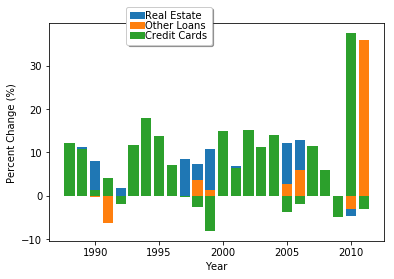

In [168]:
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Real Estate'])
#plt.bar(percentage_delta_df['Year'],percentage_delta_df['Total Loans'])
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Other Loans'])
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.show()

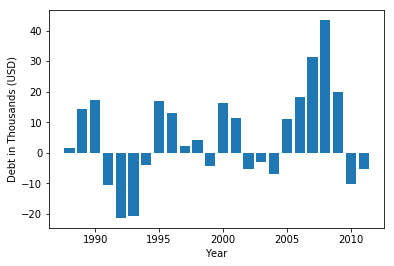

In [176]:
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Total Past Due'])
#plt.bar(debt_clean_second_rec_tot['Year'],debt_clean_third_rec_tot['Real Estate'])
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.show()

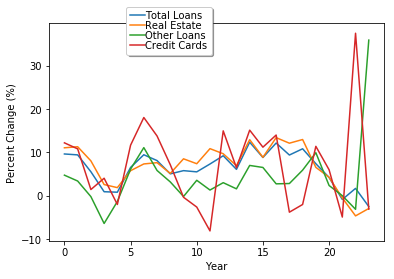

In [173]:
plt.plot(percentage_delta_df['Total Loans'])
plt.plot(percentage_delta_df['Real Estate'])
plt.plot(percentage_delta_df['Other Loans'])
plt.plot(percentage_delta_df['Credit Cards'])
plt.legend(['Total Loans', 'Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.show()

0      40563426
1      41180485
2      48058033
3      58032820
4      52539038
5      43288016
6      35896675
7      34451707
8      41434525
9      47557076
10     48603940
11     50651159
12     48568598
13     58015216
14     65464713
15     62070487
16     60210170
17     56343275
18     63321345
19     77396242
20    112628427
21    199005998
22    248397175
23    225155737
24    214063792
Name: Total Past Due, dtype: int64